In [1]:
import pandas as pd
import numpy as np
#imports
import warnings
warnings.filterwarnings("ignore")


In [2]:
import sys
# sys.path is a list of absolute path strings
sys.path.append('c:\\Users\\caperei\\portuguese_open_data\\code\\deployment')
import polarization_parliament.utils.data_utils as dtu
import polarization_parliament.nlp.nlp_function as nlpf
import polarization_parliament.polarization_model.polarized_terms as polr

In [3]:
declaracoes2=dtu.read_pre_text("speech_selected_13.csv")
names_deputies, parties_=dtu.load_deputies_names('deputies_2015_now.csv')
dates_df=dtu.load_data_legis('datas_leg.csv')
declaracoes2=dtu.clean_partiesnames(declaracoes2)


declaracoes2=nlpf.remove_punctuation(declaracoes2)
declaracoes2=nlpf.remove_names_in_speech(declaracoes2,names_deputies,parties_)
declaracoes2=nlpf.create_tokens(declaracoes2)
declaracoes2=nlpf.create_grams(declaracoes2, 3)

declaracoes2=dtu.add_dates_main(declaracoes2, dates_df)
declaracoes2=dtu.extract_president_names(declaracoes2)

declaracoes3=polr.apply_polarization_model(declaracoes2)
df_final200=nlpf.create_200r(declaracoes3)
df_final200=nlpf.add_url_finaldf(df_final200,declaracoes2)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\caperei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TypeError: create_frequency_table_grams() got an unexpected keyword argument 'right_parties'

In [15]:
df_final200.to_excel("output/polarized200.xlsx")  


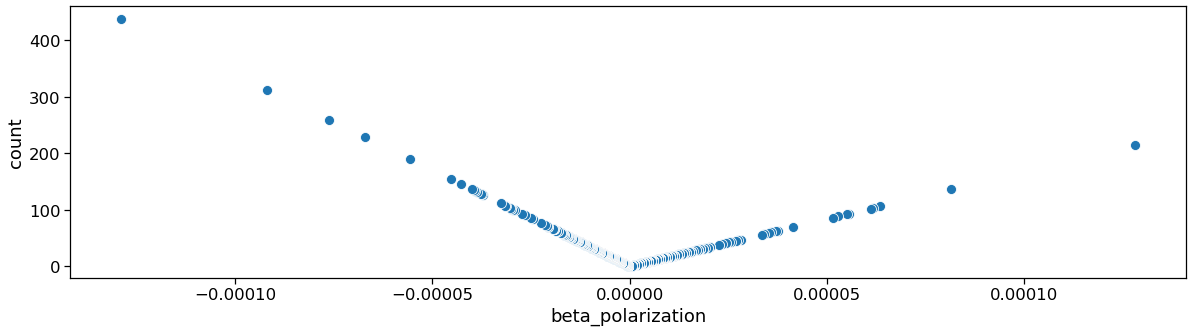

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
with sns.plotting_context("notebook",font_scale=1.5):
    sns.scatterplot(x="beta_polarization",y='count',s=100,
                data=declaracoes3)

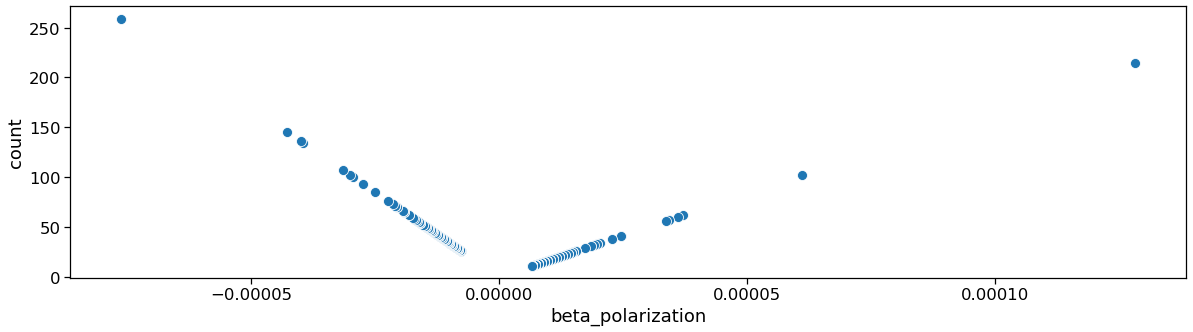

In [10]:
plt.figure(figsize=(20,5))
with sns.plotting_context("notebook",font_scale=1.5):
    sns.scatterplot(x="beta_polarization",y='count',s=100,
                data=df_final200)

In [ ]:
discutidos_final = final_df[int(final_df.shape[0]/2-200):int(final_df.shape[0]/2)].append(final_df[int(final_df.shape[0]/2):int(final_df.shape[0]/2+200)], ignore_index=True)

In [ ]:
discutidos_final

,phrase,count,f_right,f_left,f_left_total,f_right_total,f_right_minus,f_left_minus,f_right_norm,f_left_norm,f_right_minus_norm,f_left_minus_norm,pearson_quad,rho,f_left_norm_scaled,f_right_norm_scaled,pi,pi_scaled,gram_partisanship,beta_polarization
0,considerados superiores propria,1,0,1,5806912,2818821,-1.0,-1.0,0.0,1.722086e-07,-3.547582e-07,-1.722085e-07,3.909260e+06,0.0,0.0,1.722086e-07,0.0,1.0,-8.610430e-08,-1.722086e-07
1,consumo familias secretario,1,0,1,5806912,2818821,-1.0,-1.0,0.0,1.722086e-07,-3.547582e-07,-1.722085e-07,3.909260e+06,0.0,0.0,1.722086e-07,0.0,1.0,-8.610430e-08,-1.722086e-07
2,superiores propria tributacao,1,0,1,5806912,2818821,-1.0,-1.0,0.0,1.722086e-07,-3.547582e-07,-1.722085e-07,3.909260e+06,0.0,0.0,1.722086e-07,0.0,1.0,-8.610430e-08,-1.722086e-07
3,propria tributacao impedem,1,0,1,5806912,2818821,-1.0,-1.0,0.0,1.722086e-07,-3.547582e-07,-1.722085e-07,3.909260e+06,0.0,0.0,1.722086e-07,0.0,1.0,-8.610430e-08,-1.722086e-07
4,tributacao impedem visto,1,0,1,5806912,2818821,-1.0,-1.0,0.0,1.722086e-07,-3.547582e-07,-1.722085e-07,3.909260e+06,0.0,0.0,1.722086e-07,0.0,1.0,-8.610430e-08,-1.722086e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,mendes saudo palavras,1,0,1,5806912,2818821,-1.0,-1.0,0.0,1.722086e-07,-3.547582e-07,-1.722085e-07,3.909260e+06,0.0,0.0,1.722086e-07,0.0,1.0,-8.610430e-08,-1.722086e-07
396,saudo palavras quero,1,0,1,5806912,2818821,-1.0,-1.0,0.0,1.722086e-07,-3.547582e-07,-1.722085e-07,3.909260e+06,0.0,0.0,1.722086e-07,0.0,1.0,-8.610430e-08,-1.722086e-07
397,armadas presentes galerias,1,0,1,5806912,2818821,-1.0,-1.0,0.0,1.722086e-07,-3.547582e-07,-1.722085e-07,3.909260e+06,0.0,0.0,1.722086e-07,0.0,1.0,-8.610430e-08,-1.722086e-07
398,representativas militares forcas,1,0,1,5806912,2818821,-1.0,-1.0,0.0,1.722086e-07,-3.547582e-07,-1.722085e-07,3.909260e+06,0.0,0.0,1.722086e-07,0.0,1.0,-8.610430e-08,-1.722086e-07


In [ ]:
#create link
discutidos_final['reference'] = [[]] * discutidos_final.shape[0]
for n,x in enumerate(discutidos_final.phrase):
    a=[i.count(x) for i in declaracoes2.tri_grams]
    indexes=np.where(np.array(a) >= 3)[0]
    list_links=[]
    for i in indexes:
        number=add_zeros(declaracoes2.iloc[i].number ) 
        legislature=declaracoes2.iloc[i].legislatura 
        session=declaracoes2.iloc[i].session 
        date=datetime.datetime.strptime(declaracoes2.iloc[i].date , '%d/%m/%Y').strftime('%Y-%m-%d')
        url_=f'https://debates.parlamento.pt/catalogo/r3/dar/01/{legislature}/{session}/{number}/{date}' 
        list_links.append(url_)
    if list_links==[]:
        list_links=['does not appear more than 3 times']

    discutidos_final.iloc[n, discutidos_final.columns.get_loc('reference')].append(list(set(list_links)))

In [ ]:
discutidos_final.to_csv('temas_discutidos.csv')